In [1]:
# Project Image Filtering and Hybrid Images Stencil Code
# Based on previous and current work
# by James Hays for CSCI 1430 @ Brown and
# CS 4495/6476 @ Georgia Tech
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, exp, sqrt
from skimage import io, img_as_ubyte, img_as_float32
from skimage.transform import rescale, resize
#from scipy.signal import convolve2d, correlate2d
import cv2
import math
from scipy import fftpack

In [2]:
# This function can be implemented using a double loop but since we 
# have numpy we can try it without loops 
# check np.meshgrid https://www.geeksforgeeks.org/numpy-meshgrid-function/
def create_gaussian_filter(ksize, sigma):
    assert ksize%2 == 1
    x = np.linspace(-(ksize//2), ksize//2, ksize) 
    y = np.linspace(-(ksize//2), ksize//2, ksize)
    x, y = np.meshgrid(x, y)
    #print(x)
    #print(y)
    #gaussian_filter = np.zeros((ksize,ksize))
    gaussian_filter= (1/(2*math.pi*(sigma**2)))*math.e**( -((x**2) + (y**2))/(2*sigma**2))
    gaussian_filter = np.asarray(gaussian_filter, dtype=np.float32)
    #print(gaussian_filter)
    return gaussian_filter  

In [3]:
def my_imfilter(original_image: np.ndarray, my_filter: np.ndarray):
    image=original_image.copy()
   # image = img_as_float32(image)
    #(image*255).astype(np.float32)
    sumation = 0
    k,l=my_filter.shape
  #  assert (k)%2 ==1 or l%2 ==1
    #image = np.reshape(image,(image.shape[0],image.shape[1],3))
   # print(f"the image shape: {image.shape}")
    
    filtered_image = np.zeros(image.shape)
    #print(f'Filtered image shape: {filtered_image.shape}')
    padded_image = np.zeros((image.shape[0]+(k//2)*2,image.shape[1]+(l//2)*2,image.shape[2]))
    

    R,C,D = padded_image.shape
    #print("the padded image shape")
    #print(padded_image.shape)
    
    
    for z in range(0,D):
        for i in range(k//2,R-(k//2)):
            for j in range(l//2,C-(l//2)): 
                padded_image[i,j,z] = image[i-(k//2),j-(l//2),z]
            
                
    #np.pad(image, ((k//2,k//2),(l//2,l//2)), "constant")
    #R,C,D = padded_image.shape
    #print(image)
   # filtered_image = np.array(image)

#     #MAIN LOOP:
#     for z in range(0,D): #channels loop
#         for i in range(k//2,R-(k//2)): #y-axis (rows) (image) loop
#             for j in range(l//2,C-(l//2)): #x-axis (columns) (image) loop
#                 sumation = 0
#                 for  K in range(0,k): #y-axis (rows) (filter) loop
#                     for L in range(0,l): #x-axis (filter) (image) loop
#                         sumation = sumation + padded_image[i-(k//2)+K,j-(l//2)+L,z]*my_filter[K,L]
#                 filtered_image[i-k//2,j-(l//2),z] = sumation
                
       #MAIN LOOP:
    for z in range(0,D): #channels loop
        for i in range(k//2,R-(k//2)): #y-axis (rows) (image) loop
            for j in range(l//2,C-(l//2)): #x-axis (columns) (image) loop
                filtered_image[i-k//2,j-(l//2),z] = np.sum(padded_image[i-(k//2):i-(k//2)+k,j-(l//2):j-(l//2)+l,z]*my_filter)
                        
#     print("the shape")                    
#     print(filtered_image.shape)            
                
                
    #if (len(image.shape) < 3):
     #   filtered_image = correlate2d(image, filter, 'same')
    #else :
     #   filtered_image[:,:,0] = correlate2d(image[:,:,0], filter, 'same')
      #  filtered_image[:,:,1] = correlate2d(image[:,:,1], filter, 'same')
       # filtered_image[:,:,2] = correlate2d(image[:,:,2], filter, 'same')
  ##################
  # Your code here #
 # raise NotImplementedError('my_imfilter function in helpers.py needs to be implemented')
  ##################

    return img_as_float32(filtered_image)

In [98]:
def my_imfilter_frequency_Domain(original_image, my_filter):
#      img_in_freq = fftpack.fft2(img)
    
#     # we supply the img shape here to make both the filter and img have the same shape to be able to multiply
#     filter_in_freq = fftpack.fft2(f, img.shape)
#     filtered_img_in_freq = np.multiply(img_in_freq, filter_in_freq)
#     filtered_img = fftpack.ifft2(filtered_img_in_freq)
    image_in_frequency_domain= fftpack.fft2(original_image)
    filter_in_frequency_domain = fftpack.fft2(my_filter,(original_image.shape[0],original_image.shape[1]))
    filtered_image_in_frequency_domain = np.zeros((original_image.shape[0],original_image.shape[1],original_image.shape[2]),dtype = np.float32)
    filtered_image_in_frequency_domain[:,:,0] = np.multiply(image_in_frequency_domain[:,:,0], filter_in_frequency_domain)
    filtered_image_in_frequency_domain[:,:,1] = np.multiply(image_in_frequency_domain[:,:,1], filter_in_frequency_domain)
    filtered_image_in_frequency_domain[:,:,2] = np.multiply(image_in_frequency_domain[:,:,2], filter_in_frequency_domain)
    the_filtered_image = np.zeros((original_image.shape[0],original_image.shape[1],original_image.shape[2]),dtype = np.float32)
    the_filtered_image[:,:,0] = fftpack.ifft2(filtered_image_in_frequency_domain[:,:,0]).real
    the_filtered_image[:,:,1] = fftpack.ifft2(filtered_image_in_frequency_domain[:,:,1]).real
    the_filtered_image[:,:,2] = fftpack.ifft2(filtered_image_in_frequency_domain[:,:,2]).real
#     the_filtered_image[:,:,0]= np.absolute( the_filtered_image[:,:,0])
#     the_filtered_image[:,:,1]= np.absolute( the_filtered_image[:,:,1])
#     the_filtered_image[:,:,2]= np.absolute( the_filtered_image[:,:,2])
#     print(the_filtered_image)
    the_filtered_image = ( the_filtered_image -  the_filtered_image.min()) / ( the_filtered_image.max() -  the_filtered_image.min())
    return the_filtered_image

In [93]:
a = np.array([[[0.5,1.5,3,6,7], [2,3,4,5,2], [2,7,6,9,1], [2,6,4,7,1], [4,3,6,1,8], [5,6,7,9,0]], [[0.5,1.5,3,6,7], [2,3,4,5,2], [2,7,6,9,1], [2,6,4,7,1], [4,3,6,1,8], [5,6,7,9,0]], [[0.5,1.5,3,6,7], [2,3,4,5,2], [2,7,6,9,1], [2,6,4,7,1], [4,3,6,1,8], [5,6,7,9,0]]])
print(a.shape)
b = np.array(np.ones((9,5), dtype = np.float32))
my_imfilter(a,b)


(3, 6, 5)


array([[[13.5, 34.5, 39. , 60. , 30. ],
        [19.5, 52.5, 51. , 81. , 33. ],
        [31.5, 61.5, 69. , 84. , 57. ],
        [45. , 75. , 81. , 93. , 36. ],
        [39. , 66. , 69. , 78. , 30. ],
        [33. , 45. , 51. , 51. , 27. ]],

       [[13.5, 34.5, 39. , 60. , 30. ],
        [19.5, 52.5, 51. , 81. , 33. ],
        [31.5, 61.5, 69. , 84. , 57. ],
        [45. , 75. , 81. , 93. , 36. ],
        [39. , 66. , 69. , 78. , 30. ],
        [33. , 45. , 51. , 51. , 27. ]],

       [[13.5, 34.5, 39. , 60. , 30. ],
        [19.5, 52.5, 51. , 81. , 33. ],
        [31.5, 61.5, 69. , 84. , 57. ],
        [45. , 75. , 81. , 93. , 36. ],
        [39. , 66. , 69. , 78. , 30. ],
        [33. , 45. , 51. , 51. , 27. ]]], dtype=float32)

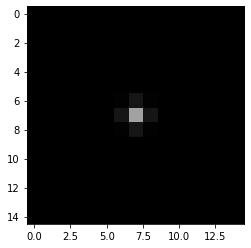

In [58]:
test_vector = np.zeros((15,15,3))
test_vector[7,7,:] = 1.0
gaussian_test_vector =  create_gaussian_filter(7, 0.5)
test_vector_filtered = my_imfilter(test_vector, gaussian_test_vector)
plt.imshow(test_vector_filtered)
plt.show()

In [59]:
def gen_hybrid_image(image1: np.ndarray, image2: np.ndarray, cutoff_frequency: float):
    
    


    assert image1.shape == image2.shape
    kernel_size = 2*3*cutoff_frequency
    if(kernel_size%2 ==0):
        kernel_size = kernel_size+1
        
  # Steps:
  # (1) Remove the high frequencies from image1 by blurring it. The amount of
  #     blur that works best will vary with different image pairs
  # generate a gaussian kernel with mean=0 and sigma = cutoff_frequency,
  # Just a heads up but think how you can generate 2D gaussian kernel from 1D gaussian kernel
    kernel = create_gaussian_filter(kernel_size, cutoff_frequency)
  
  # Your code here:
    low_frequencies = my_imfilter(image1, kernel) # Replace with your implementation

  # (2) Remove the low frequencies from image2. The easiest way to do this is to
  #     subtract a blurred version of image2 from the original version of image2.
  #     This will give you an image centered at zero with negative values.
  # Your code here #
    high_frequencies =image2-my_imfilter(image2, kernel)  # Replace with your implementation

  # (3) Combine the high frequencies and low frequencies
  # Your code here #
    hybrid_image = image1/2+image2 # Replace with your implementation

  # (4) At this point, you need to be aware that values larger than 1.0
  # or less than 0.0 may cause issues in the functions in Python for saving
  # images to disk. These are called in proj1_part2 after the call to 
  # gen_hybrid_image().
  # One option is to clip (also called clamp) all values below 0.0 to 0.0, 
  # and all values larger than 1.0 to 1.0.
  # (5) As a good software development practice you may add some checks (assertions) for the shapes
  # and ranges of your results. This can be performed as test for the code during development or even
  # at production!

    return low_frequencies, high_frequencies, hybrid_image


In [84]:
def vis_hybrid_image(hybrid_image: np.ndarray):
    

    scales = 5
    scale_factor = 0.5
    padding = 5
    original_height = hybrid_image.shape[0]
    num_colors = 1 if hybrid_image.ndim == 2 else 3

    output = np.copy(hybrid_image)
    cur_image = np.copy(hybrid_image)
    for scale in range(2, scales+1):
        
    # add padding
        output = np.hstack((output, np.ones((original_height, padding, num_colors),dtype=np.float32)))
    # downsample image
        #cur_image = rescale(cur_image, scale_factor, mode='reflect')
        cur_image = resize(cur_image, (int(cur_image.shape[0]*scale_factor),int(cur_image.shape[1]*scale_factor) ),anti_aliasing=True)
        print(cur_image.shape)
    # pad the top to append to the output
        pad = np.ones((original_height-cur_image.shape[0], cur_image.shape[1], num_colors), dtype=np.float32)
        tmp = np.vstack((pad, cur_image))
        output = np.hstack((output, tmp))
    return output

In [61]:
def load_image(path):
    return img_as_float32(io.imread(path))

def save_image(path, im):
    return io.imsave(path, img_as_ubyte(im.copy()))

In [62]:
# def im2single(im):
#     im = im.astype(np.float32) / 255
#     return im

# def single2im(im):
#     im *= 255
#     im = im.astype(np.uint8)
#     return im

# def load_image(path):
#     return im2single(cv2.imread(path))[:, :, ::-1]

# def save_image(path, im):
#     return cv2.imwrite(path, single2im(im.copy())[:, :, ::-1])

In [63]:
def visualize_image(figure_name: str, img: np.ndarray):
    cv2.imshow(figure_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [64]:
resultsDir = '..' + os.sep + 'results'
if not os.path.exists( resultsDir ):
    os.mkdir( resultsDir )

(361, 410, 3)


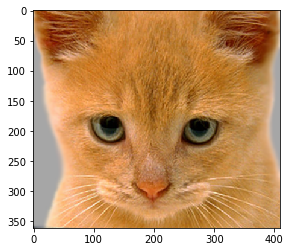

In [65]:
test_image = load_image('../data/cat.bmp')
print(test_image.shape)
plt.imshow(test_image);
plt.show()
#test_image = rescale(test_image, 0.7, mode='reflect')

In [66]:

#test_image = load_image(r'../data/dog.bmp')
# (image1*255).astype(np.float32)
# image2 = load_image(r"C:\Users\asus\Desktop\cv_filteredImages\data\cat.bmp")
# (image2*255).astype(np.float32)

# display the dog and cat images\n",
# plt.imshow(image1);
# plt.show()
# plt.imshow(image2);
# plt.show()

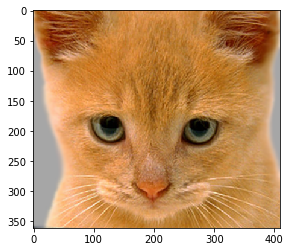

In [99]:

identity_filter = np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=np.float32)
gaussian_test_vector =  create_gaussian_filter(7, 0.5)
identity_image = my_imfilter(test_image, identity_filter)
#cv2.imshow('an image', identity_image)
plt.imshow(identity_image)
done=save_image('../results/identity_image.bmp', identity_image)
#identity_image.shape
#identity_image=img_as_float32(identity_image)
#identity_image=(identity_image).astype(np.uint8) 
#identity_image.shape
#plt.imshow(identity_image);
#plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


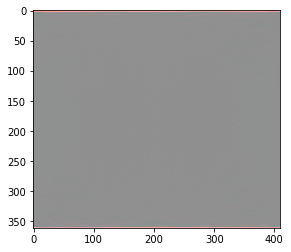

In [101]:

#Small blur with a box filter
#This filter should remove some high frequencies.

blur_filter = np.ones((3, 3), dtype=np.float32)
blur_filter /= np.sum(blur_filter, dtype=np.float32)  # making the filter sum to 1
blur_image = my_imfilter(test_image, blur_filter)
blur_image_freq=my_imfilter_frequency_Domain(test_image,blur_filter)
plt.imshow(blur_image)
plt.imshow(blur_image_freq)
done = save_image(resultsDir + os.sep + 'blur_image.jpg', blur_image)

In [ ]:

#Large blur
#This blur would be slow to do directly, so we instead use the fact that Gaussian blurs are separable and blur sequentially in each direction.

# generate a gaussian kernel with any parameters of your choice. you may only in this case use a function
# from any library to generate the kernel such as: cv2.getGaussianKernel() then use the kernel to check your
# my_imfilter() implementation
# https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype)

## Slow (naive) version of large blur
# import time
# large_blur_filter = np.dot(large_1d_blur_filter, large_1d_blur_filter.T)
# t = time.time()
# large_blur_image = my_imfilter(test_image, large_blur_filter);
# t = time.time() - t
# print('{:f} seconds'.format(t))
##


In [ ]:

#Oriented filter (Sobel operator)

sobel_filter = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)  # should respond to horizontal gradients
sobel_image = my_imfilter(test_image, sobel_filter)

# 0.5 added because the output image is centered around zero otherwise and mostly black
sobel_image = np.clip(sobel_image+0.5, 0.0, 1.0)
plt.imshow(sobel_image)
done = save_image(resultsDir + os.sep + 'sobel_image.jpg', sobel_image)




In [ ]:

#High pass filter (discrete Laplacian)

laplacian_filter = np.asarray([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
laplacian_image = my_imfilter(test_image, laplacian_filter)

# added because the output image is centered around zero otherwise and mostly black
laplacian_image = np.clip(laplacian_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(laplacian_image)
done = save_image(resultsDir + os.sep + 'laplacian_image.jpg', laplacian_image)

# High pass "filter" alternative
high_pass_image = test_image - blur_image
high_pass_image = np.clip(high_pass_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(high_pass_image)
done = save_image(resultsDir + os.sep + 'high_pass_image.jpg', high_pass_image)


In [185]:
# Before trying to construct hybrid images, it is suggested that you
# implement my_imfilter in helpers.py and then debug it using proj1_part1.py

# Debugging tip: You can split your python code and print in between
# to check if the current states of variables are expected or use a proper debugger.

## Setup
# Read images and convert to floating point format
image1 = load_image('../data/fish.bmp')

print(image1.shape)
image2 = load_image('../data/submarine.bmp')


(307, 375, 3)


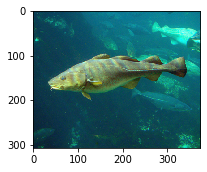

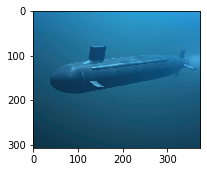

In [186]:
# display the dog and cat images
plt.figure(figsize=(3,3))
plt.imshow((image1).astype(np.float32))
plt.figure(figsize=(3,3))
plt.imshow((image2).astype(np.float32))

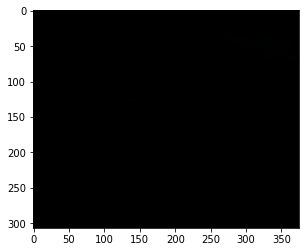

In [187]:
 #For your write up, there are several additional test cases in 'data'.
# Feel free to make your own, too (you'll need to align the images in a
# photo editor such as Photoshop).
# The hybrid images will differ depending on which image you
# assign as image1 (which will provide the low frequencies) and which image
# you asign as image2 (which will provide the high frequencies)

## Hybrid Image Construction ##
# cutoff_frequency is the standard deviation, in pixels, of the Gaussian#
# blur that will remove high frequencies. You may tune this per image pair
# to achieve better results.
cutoff_frequency = 15
low_frequencies, high_frequencies, hybrid_image = gen_hybrid_image(image1, image2, cutoff_frequency)
#plt.imshow(hybrid_image.astype(np.uint8))
#print(low_frequencies.shape)
#print(high_frequencies.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(153, 187, 3)
(76, 93, 3)
(38, 46, 3)
(19, 23, 3)


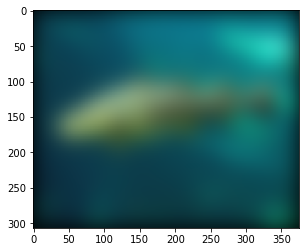

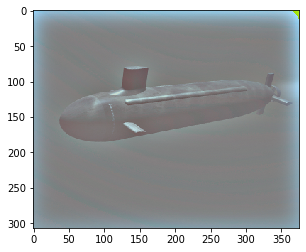

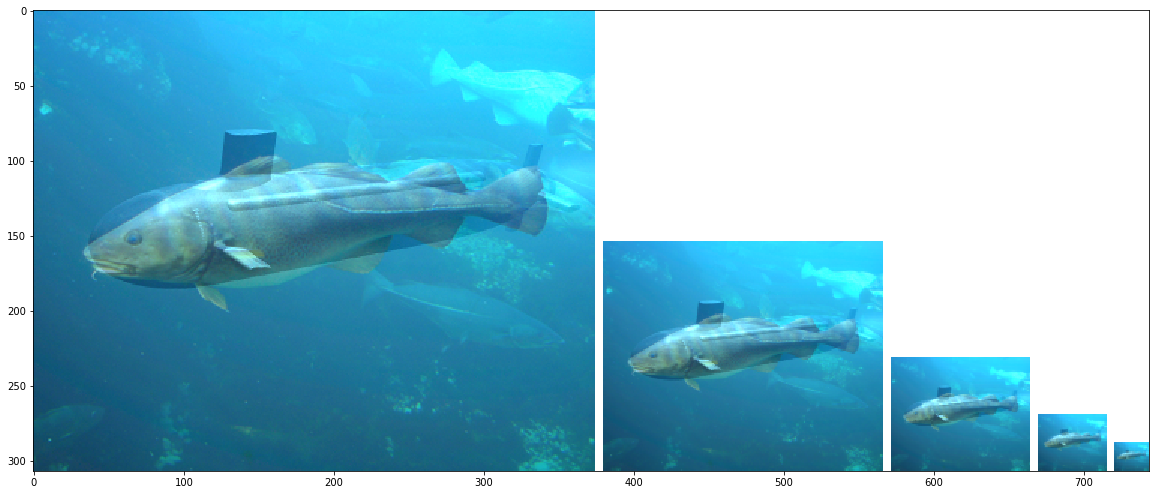

In [188]:
## Visualize and save outputs ##
plt.figure()
plt.imshow((low_frequencies*255).astype(np.uint8))
plt.figure()
plt.imshow(((high_frequencies+0.5)*255).astype(np.uint8))
vis = vis_hybrid_image(hybrid_image)
plt.figure(figsize=(20, 20))
plt.imshow(vis)

In [189]:
save_image('../results/low_frequencies.jpg', low_frequencies)
save_image('../results/high_frequencies.jpg', high_frequencies)#why did we add here 0.5
save_image('../results/hybrid_image.jpg', hybrid_image)
save_image('../results/hybrid_image_scales.jpg', vis)

ValueError: Images of type float must be between -1 and 1.